<a href="https://colab.research.google.com/github/cristianogoss/Projetos-Data-Science/blob/master/Analisando_os_Dados_do_Airbnb_Buenos_Aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Análise dos Dados do Airbnb - Buenos Aires

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2019-07-16/visualisations/listings.csv")

## Análise dos Dados



*   id - número de id gerado para identificar o imóvel
*   name - nome da propriedade anunciada
*   host_id - número de id do proprietário (anfitrião) da propriedade
*   host_name - Nome do anfitrião
*   neighbourhood_group - esta coluna não contém nenhum valor válido
*   neighbourhood - nome do bairro
*   latitude - coordenada da latitude da propriedade
*   longitude - coordenada da longitude da propriedade
*   room_type - informa o tipo de quarto que é oferecido
*   price - preço para alugar o imóvel
*   minimum_nights - quantidade mínima de noites para reservar
*   number_of_reviews - número de reviews que a propriedade possui
*   last_review - data do último review
*   reviews_per_month - quantidade de reviews por mês
*   calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
*   availability_365 - número de dias de disponibilidade dentro de 365 dias



Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,7270,¡¡Great Loft in Palermo Hollywood!!,18822,Toni,NaN,Palermo,-34.58241,-58.43382,Entire home/apt,1801,20,14,2018-04-30,0.16,1,325
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58225,-58.42460,Entire home/apt,2471,2,24,2019-07-03,0.28,1,360
2,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,1005,1,20,2017-12-11,0.18,1,365
3,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59382,-58.42994,Private room,2303,1,1,2018-12-18,0.14,7,365
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59398,-58.42853,Private room,2303,1,0,NaN,NaN,7,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [0]:
# identificar o volume de dados do DataFrame
print("Variáveis:\t {}".format(df.shape[0]))
print("Entradas:\t {}\n".format(df.shape[1]))


# verificar as 5 primeiras entradas do dataset
df.dtypes


Variáveis:	 20715
Entradas:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 28% das linhas.
* Nas variáveis `name` e `host_name` praticamente não existem valores nulos

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)


neighbourhood_group               1.000000
reviews_per_month                 0.287907
last_review                       0.287907
name                              0.000531
host_name                         0.000434
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Iremos plotar um histograma para vermos como estão distribuídas as variáveis

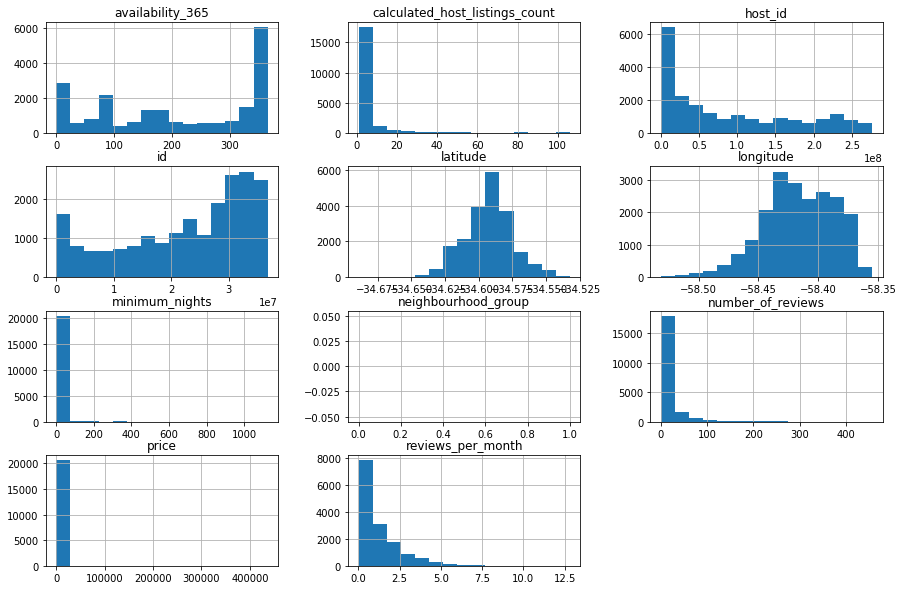

In [0]:
# plotar o histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10));



### **Q4. Qual a média dos preços de aluguel?**

A média dos preços dos aluguéis em Buenos Aires é de **$ARS 2391,17**(pesos argentinos) , não irei fazer a conversão para real ou dólar pois o peso argentino é uma moeda muito inconstante no mercado 

In [0]:
# ver a média da coluna `price`

df["price"].sum() / df["price"].count()


2391.1795800144823

In [0]:
df["price"].describe()

count     20715.000000
mean       2391.179580
std        8890.136396
min         126.000000
25%         963.000000
50%        1508.000000
75%        2387.000000
max      436553.000000
Name: price, dtype: float64

### **Q4. Qual a correlação existente entre as variáveis**

Correlação, significa uma relação entre duas coisas, ou seja,  na matriz abaixo, vamos tentar identificar a relação entre as variáveis, como por exemplo a coluna **"price"**(preço) com a coluna **"minimun_nights"**(mínimo de noites)

In [0]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação

corr


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.005956,-0.015798,-0.019970,0.026626,0.051133
minimum_nights,-0.005956,1.000000,-0.065669,-0.079381,0.022774,0.049453
number_of_reviews,-0.015798,-0.065669,1.000000,0.469774,-0.052265,0.049693
reviews_per_month,-0.019970,-0.079381,0.469774,1.000000,-0.115060,-0.061142
calculated_host_listings_count,0.026626,0.022774,-0.052265,-0.115060,1.000000,0.076323
availability_365,0.051133,0.049453,0.049693,-0.061142,0.076323,1.000000


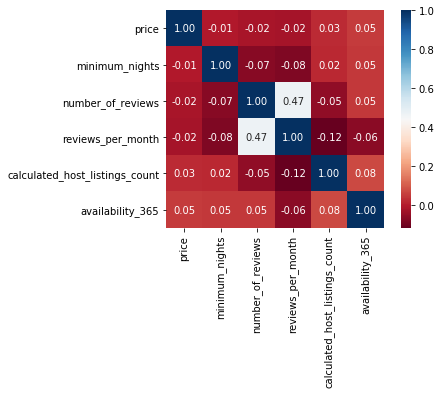

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap="RdBu", fmt=".2f", square=True, linecolor="white", annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
A variável **room_type**  especifica que tipo de acomodações estão disponíveis em Buenos Aires

Como podemos ver, as pessoas preferem alugar apartamentos **inteiros**(Entire home/apt), seguido pelos **quartos privados**(Private room), em terceiro lugar os **quartos compartilhados**(Shared room)

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()


Entire home/apt    15558
Private room        4540
Shared room          617
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() /df.shape[0]


Entire home/apt    0.751050
Private room       0.219165
Shared room        0.029785
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**


**Mataderos** é o bairro mais caro da cidade para se hospedar segundo o **AirBnb**, isso se deve por ser um local totalmente turistico, também é local de nascimento de pessoas importantes na Argentina, o local é famoso pela sua Feira de Mataderos, tradicional ponto turistico do bairro. 

A média do aluguel por dia custa: $ARS 9985,18 mil pesos argentinos


In [0]:
# ver preços por bairros, na média
df.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Mataderos            9985.181818
Villa Gral. Mitre    8506.962963
Puerto Madero        7525.401709
Villa Real           4200.888889
Monte Castro         3927.000000
Monserrat            3783.136000
Villa Soldati        2882.333333
Constitucion         2805.367550
Retiro               2745.492850
Nueva Pompeya        2741.384615
Name: price, dtype: float64

Segundo o gráfico de **latitude e longitude**, a concentração de imóveis tem uma localização próxima ao rio da prata, pois é onde se concentram o turismo e os bairros nobres da cidade

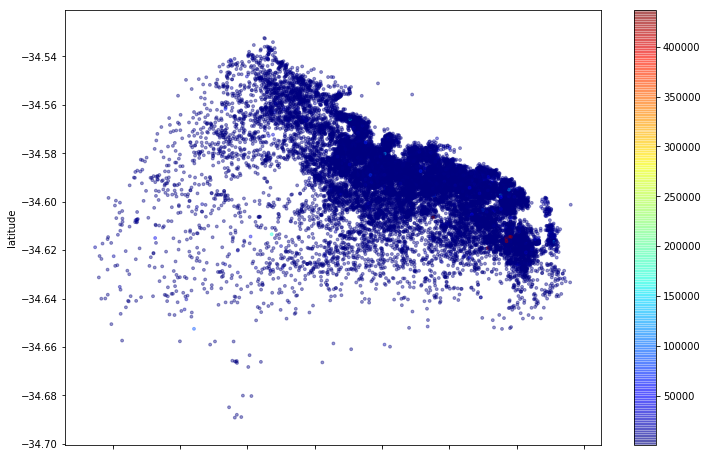

In [0]:
# plotar os imóveis pela latitude-longitude

df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

E como o **Airbnb** é considerado o maior hotel do mundo, sem instalações físicas próprias, o mesmo oferece acomodações mais baratas do que em hotéis, e o mínimo de noites podem variar de **1 a 30** dias, mas média em geral é de **seis noites**

In [0]:
# ver a média da coluna `minimum_nights``

df["minimum_nights"].sum() / df['minimum_nights'].count()

5.8709630702389575

## Conclusões


Ao analisar esses dados, pudemos tirar alguns insights do comportamento dos usuários em relação ao consumo de diárias pelo AirBnb

Foi feita uma análise superficial, pois existem muitos dados a serem tratados para que se tenha uma veracidade total dos fatos

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.